### MY DATASET:   
    Employee Future Prediction  
### INTRODUCTION:   
    It includes information such as employees education details, joining year, city of office, 
    payment tier, age, gender if the employee is ever kept out of projects for 1 month or more, and 
    experience in the current field 2. The dataset aims to predict whether an employee will leave 
    the company in the next two years and to build a predictive model that predicts the prospects 
    of future and present employees.  
    Performing EDA on this dataset can help us gain insights into the factors contributing to 
    employee attrition and identify the most important patterns in the data. This can help us build 
    better models that accurately predict employee attrition and improve employee retention 
    rates.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description 

- Read the imported file 


In [3]:
df = pd.read_csv("Employee.csv")
df

# All columns 

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## Q1: What are the names and data types of the columns?

In [4]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

## Q2: What are the basic summary statistics?

In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## Q3: Are there any categorical variables and missing values ? If so print it .

In [6]:
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
missing_values = df.isna().sum()

print("Categorical variables:")
print(categorical_variables)

print("Missing values:")
print(missing_values)

Categorical variables:
['Education', 'City', 'Gender', 'EverBenched']
Missing values:
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


## Q4 : Are there any outliers in the data? If so use box plots, histograms and visualize.

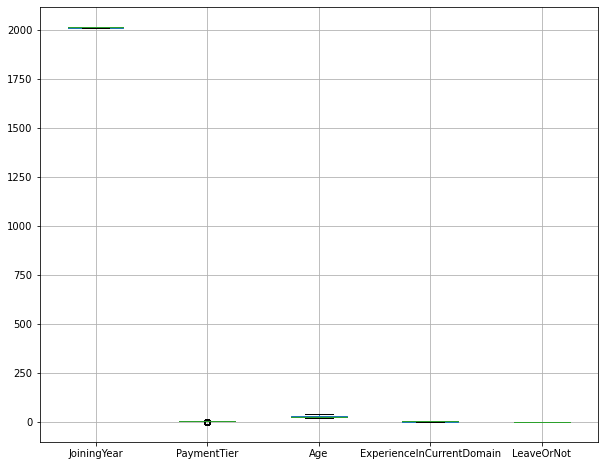

<Figure size 432x288 with 0 Axes>

In [7]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the box plot
df.boxplot(ax=ax)

# Create a new figure for the histogram
plt.figure()

# Show the chart
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21772\4225173582.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax2)


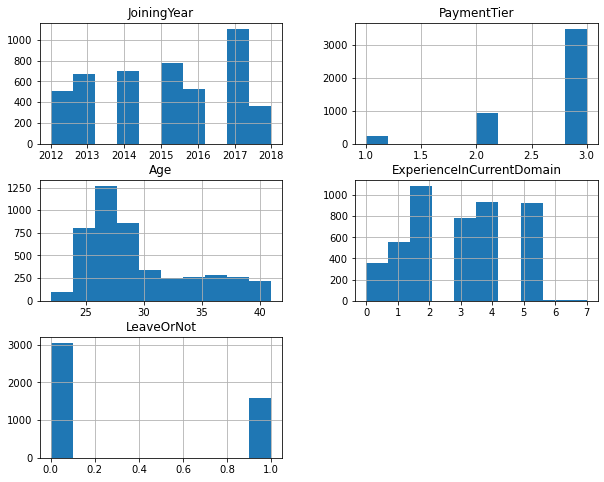

In [8]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# # Plot the box plot
# df.boxplot(ax=ax1)

# Plot the histogram
df.hist(ax=ax2)

# Show the chart
plt.show()

## Q5: Is the data balanced or imbalanced? Visualize.

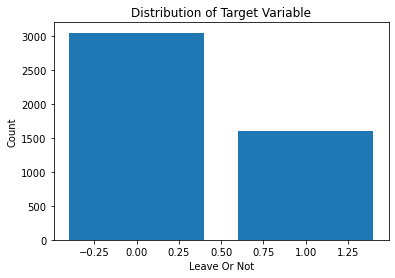

In [9]:
# Count the number of instances in each category
counts = df['LeaveOrNot'].value_counts()

# Create a bar chart
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Leave Or Not')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Show the chart
plt.show()

## Q6: What is the target variable (if any).

In [10]:
# The target variable in a dataset refers to the variable that we are trying to predict or classify. 
print(df.LeaveOrNot)

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64


## Q7: What are the units of measurement for numerical columns? ( example : time , currency ,date, distance). 

## Ans 7:
## JoiningYear: Year
## PaymentTier: Integer
## Age: Years
## ExperienceInCurrentDomain: Years

## Q8: Do you have domain clarification? Brief it .

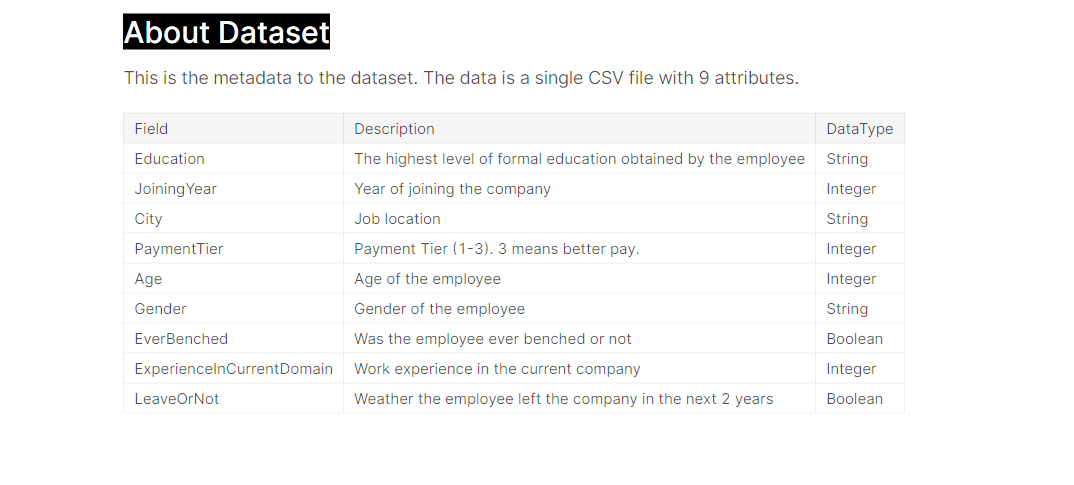

## Q9: Are there any time-based trends or patterns?

## Ans9: Yes, JoiningYear,Age,ExperienceInYears is time based.

## Q10: Are there any correlations between variables? Calculate correlation.

In [11]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)
# weak correlations

                           JoiningYear  PaymentTier       Age  \
JoiningYear                   1.000000    -0.096078  0.013165   
PaymentTier                  -0.096078     1.000000  0.007631   
Age                           0.013165     0.007631  1.000000   
ExperienceInCurrentDomain    -0.036525     0.018314 -0.134643   
LeaveOrNot                    0.181705    -0.197638 -0.051126   

                           ExperienceInCurrentDomain  LeaveOrNot  
JoiningYear                                -0.036525    0.181705  
PaymentTier                                 0.018314   -0.197638  
Age                                        -0.134643   -0.051126  
ExperienceInCurrentDomain                   1.000000   -0.030504  
LeaveOrNot                                 -0.030504    1.000000  


## Q11: Perform Multivariate Analysis on dataset.

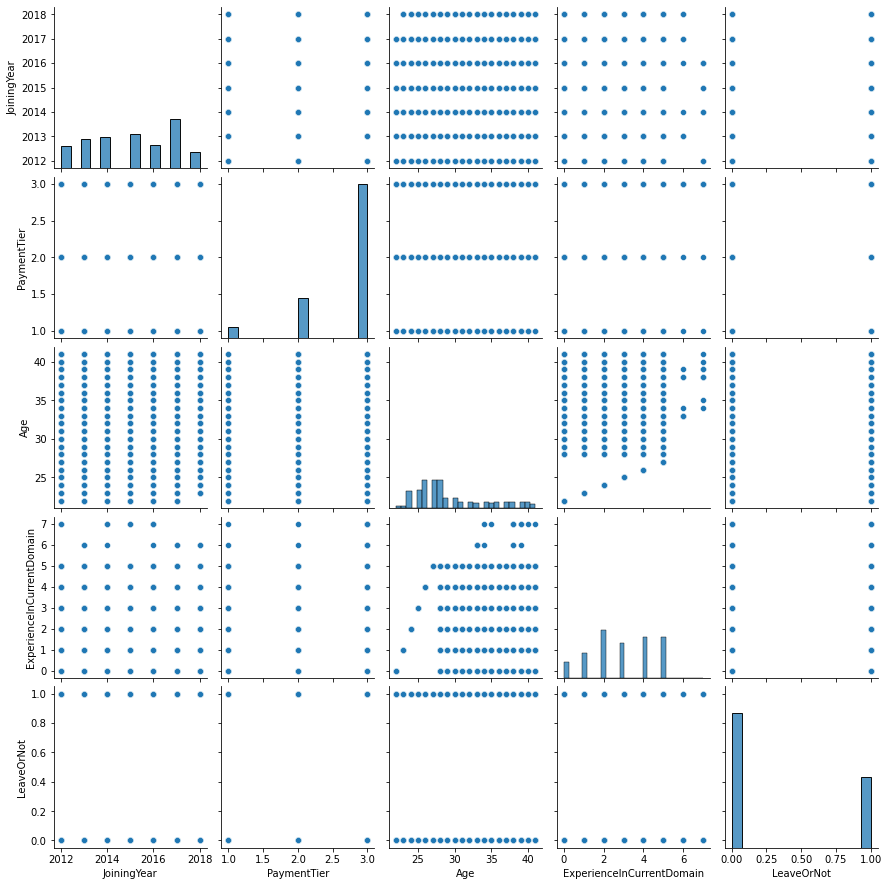

In [12]:
sns.pairplot(df)

## Q12:How is categorical data distributed.

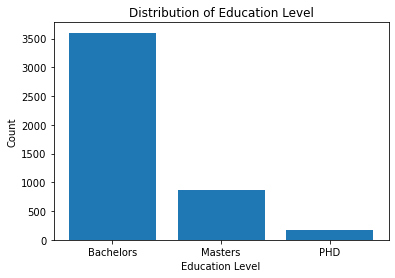

In [13]:
category_counts = df['Education'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.show()

## Q13: Draw scatter plot between any two features.

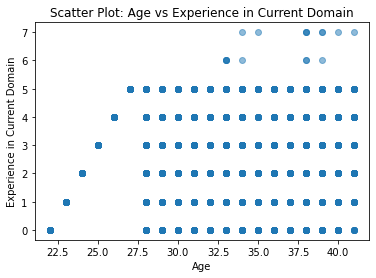

In [14]:
plt.scatter(df['Age'], df['ExperienceInCurrentDomain'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Experience in Current Domain')
plt.title('Scatter Plot: Age vs Experience in Current Domain')
plt.show()

## Q14: Perform bivariate analysis between any two features .

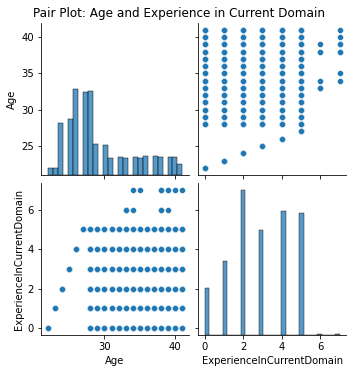

In [46]:
sns.pairplot(df[['Age', 'ExperienceInCurrentDomain']])
plt.suptitle('Pair Plot: Age and Experience in Current Domain', y=1.02)
plt.show()

## Q15 : What is average values of all columns if numberical data if any.

In [16]:
df.mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21772\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


JoiningYear                  2015.062970
PaymentTier                     2.698259
Age                            29.393295
ExperienceInCurrentDomain       2.905652
LeaveOrNot                      0.343864
dtype: float64

## Q16 :What is standard deviation in PaymentTier ?

In [17]:
df['PaymentTier'].std()

0.5614354643365083

## Q17: Make a bar plot using your dataset.

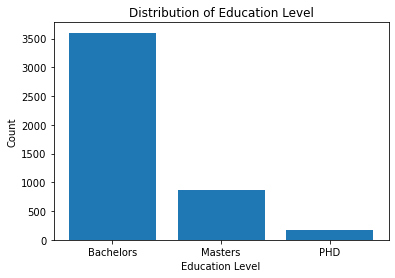

In [18]:
# Calculate the counts for each education level
education_counts = df['Education'].value_counts()

# Create a bar plot
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.show()

## Q18: Draw histogram for gender in this dataframe ?

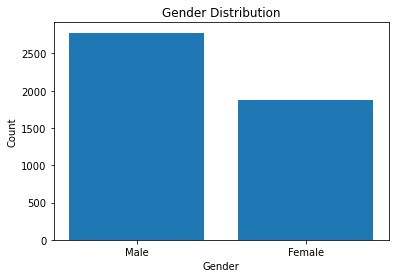

In [19]:
# Count the number of occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a bar plot (histogram) for gender
plt.bar(gender_counts.index, gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

## Q19: Perform univariate analysis on any column.

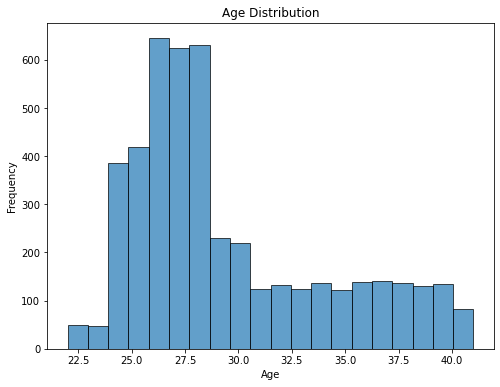

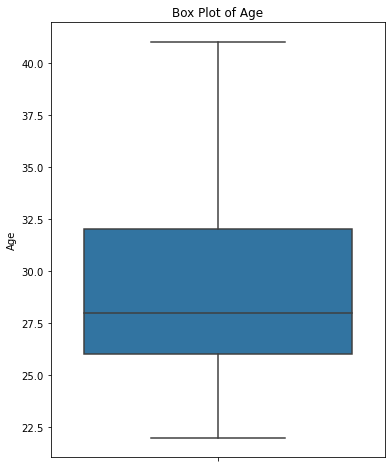

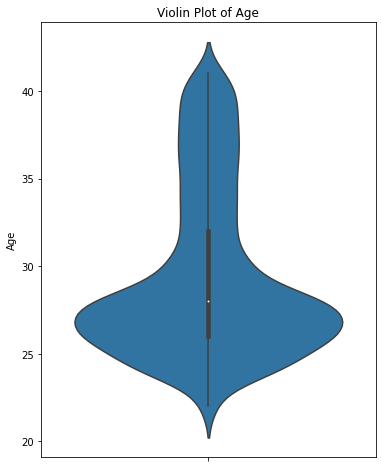

In [26]:
# Distribution of Age using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Box plot for Age
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['Age'])
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

# Violin plot for Age
plt.figure(figsize=(6, 8))
sns.violinplot(y=df['Age'])
plt.ylabel('Age')
plt.title('Violin Plot of Age')
plt.show()

# Q20: Rename any column name.

In [21]:
df.rename(columns={'Gender': 'Sex'},inplace=True)
df

,Education,JoiningYear,City,PaymentTier,Age,Sex,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## Performing hypothestis testing

In [22]:
from scipy import stats
# Filter data for Pune and New Delhi
pune_data = df[df["City"] == "Pune"]
delhi_data = df[df["City"] == "New Delhi"]

# Perform a two-sample t-test
alpha = 0.05  # Significance level
t_stat, p_value = stats.ttest_ind(pune_data["Age"], delhi_data["Age"])

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis
t-statistic: 0.8755007348591244
P-value: 0.3813882892099917
